# Sales Forecasting (Objectives)


### <u>Defined Objectives</u>
For [Company], our goal is to harness advanced analytics to elevate your e-commerce operations. Leveraging a comprehensive dataset detailing historical sales transactions, we aim to:

1. **Forecast Sales**: Predict future sales across various products and timeframes—weekly, monthly, and quarterly. This foresight will enable [Company] to optimize inventory levels, ensuring products are adequately stocked to meet demand without overburdening storage with excess inventory.

2. **Identify Key Sales Drivers**: Uncover the factors that significantly impact sales. By analyzing product categories, sales channels, promotional activities, and customer purchasing patterns, we can pinpoint what influences buyers. This insight will inform targeted marketing and promotional strategies, boosting sales efficiency.

### <u>Assessment of the Situation:</u>

- **Available Resources**: The dataset encompasses transaction dates, product details, sales amounts, quantity sold, shipping details, sales channels, promotion details, and B2B transaction flags. Tools include data analysis and machine learning software capable of handling time series forecasting and regression analysis. Personnel resources involve data scientists and analysts with expertise in predictive modeling and business intelligence.

- **Requirements**: To achieve the objectives, it is essential to preprocess the data for quality, extract relevant features, and select appropriate modeling techniques for forecasting and driver analysis. Additionally, close collaboration with the marketing and inventory management teams is required to align on strategy implementation.

- **Assumptions**: The project assumes that historical sales patterns will continue into the future, allowing for predictive modeling. It also assumes that external factors not captured in the dataset, such as macroeconomic conditions and competitor actions, will remain constant or their impact can be reasonably estimated.

- **Risks**: Key risks include potential data quality issues, such as missing values or inaccuracies in sales and inventory data. Changing market conditions or consumer preferences not reflected in historical data could also impact forecasting accuracy. Finally, the reliance on assumptions about constant external factors poses a risk to the validity of the forecasts.

In [47]:
# INSTALLATIONS
# !pip install pandas
# !pip install openpyxl

In [48]:
import pandas as pd
import os

f_path = r'/content/drive/MyDrive/UCBerkeley/SalesForecasting/data/AmazonSalesReport.csv'
csv_path = r'data\AmazonSalesReport.csv'
xlsx_path = r'data\AmazonSalesReport.xlsx'

if os.path.isfile(csv_path):
    print('Reading File.')
else:
    print("Need to create this file")
    # Load the XLSX file
    # df = pd.read_excel(xlsx_path)
    # -----------------------------------------
    # Save to CSV format
    # df.to_csv(csv_path, index=False)  # Set index=False to not write row indices

df = pd.read_csv(csv_path)


Reading File.


In [49]:
df.sample(1)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
123025,405-8192485-8957953,2022-06-05,Shipped,Amazon,Amazon.in,Expedited,SET229,SET229-KR-PP-XS,Set,XS,...,INR,845.0,CHENNAI,TAMIL NADU,600129.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,0.0


In [50]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  object 
 1   Date                128975 non-null  object 
 2   Status              128975 non-null  object 
 3   Fulfilment          128975 non-null  object 
 4   Sales Channel       128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

In [51]:
# Basic statistics of the dataset
df.describe()

,Qty,Amount,ship-postal-code,Unnamed: 22
count,128975.000000,121180.000000,128942.000000,79925.0
mean,0.904431,648.561465,463966.236509,0.0
std,0.313354,281.211687,191476.764941,0.0
min,0.000000,0.000000,110001.000000,0.0
25%,1.000000,449.000000,382421.000000,0.0
50%,1.000000,605.000000,500033.000000,0.0
75%,1.000000,788.000000,600024.000000,0.0
max,15.000000,5584.000000,989898.000000,0.0


- ### Counting Unique Values
    - Counting the unique values of the categorical variables to see if there is features displaying high cardinality (>10 unqiue feautures)

In [52]:
cat_features = df.select_dtypes(include='object')
cat_features.nunique()

Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
currency                   1
ship-city               8955
ship-state                69
ship-country               1
promotion-ids           5787
fulfilled-by               1
dtype: int64

In [53]:
df['Sales Channel'] = df['Sales Channel ']

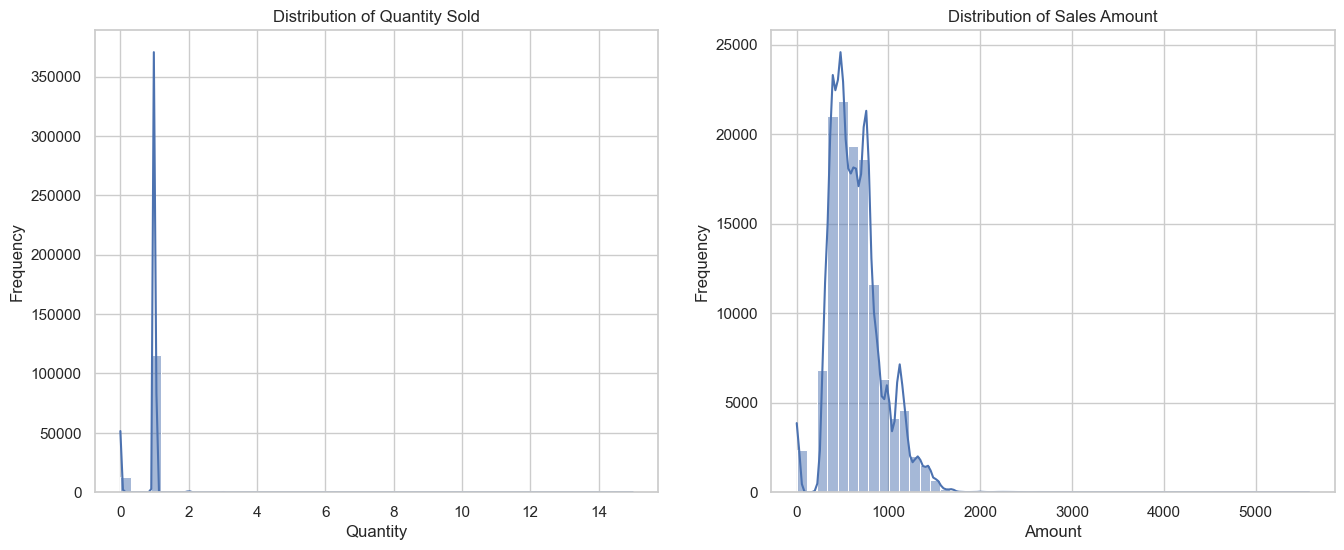

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetics for plots
sns.set(style="whitegrid")

# Distribution of key numerical variables: Quantity and Amount
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Quantity distribution
sns.histplot(df['Qty'], bins=50, kde=True, ax=ax[0])
ax[0].set_title('Distribution of Quantity Sold')
ax[0].set_xlabel('Quantity')
ax[0].set_ylabel('Frequency')

# Amount distribution
sns.histplot(df['Amount'], bins=50, kde=True, ax=ax[1])
ax[1].set_title('Distribution of Sales Amount')
ax[1].set_xlabel('Amount')
ax[1].set_ylabel('Frequency')
plt.show()

<Figure size 640x480 with 0 Axes>

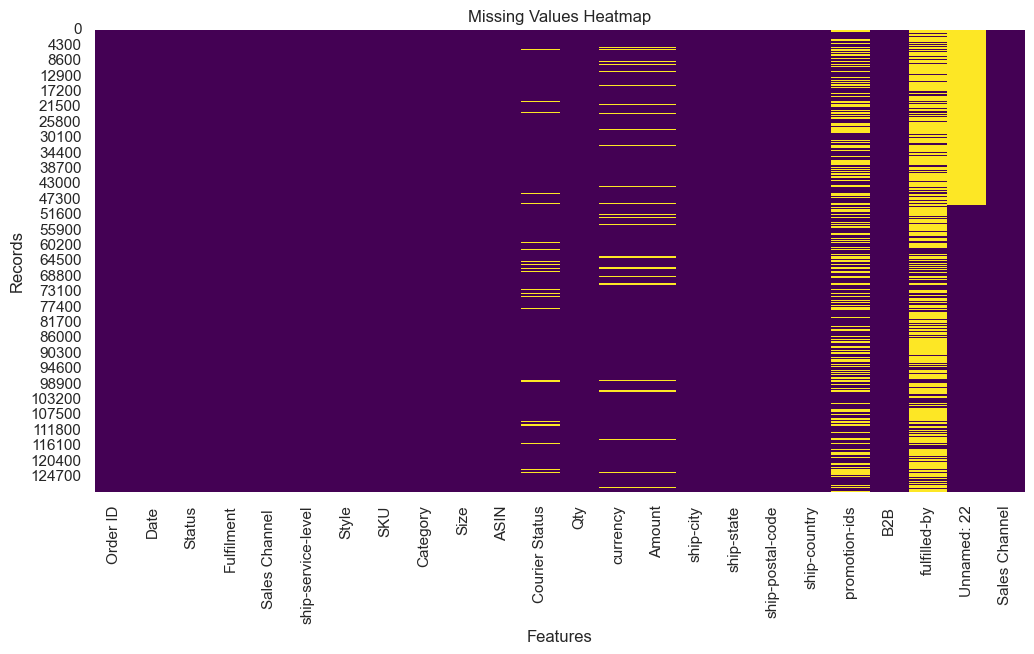

In [55]:
plt.tight_layout()

# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title('Missing Values Heatmap')
plt.xlabel('Features')
plt.ylabel('Records')
plt.show()

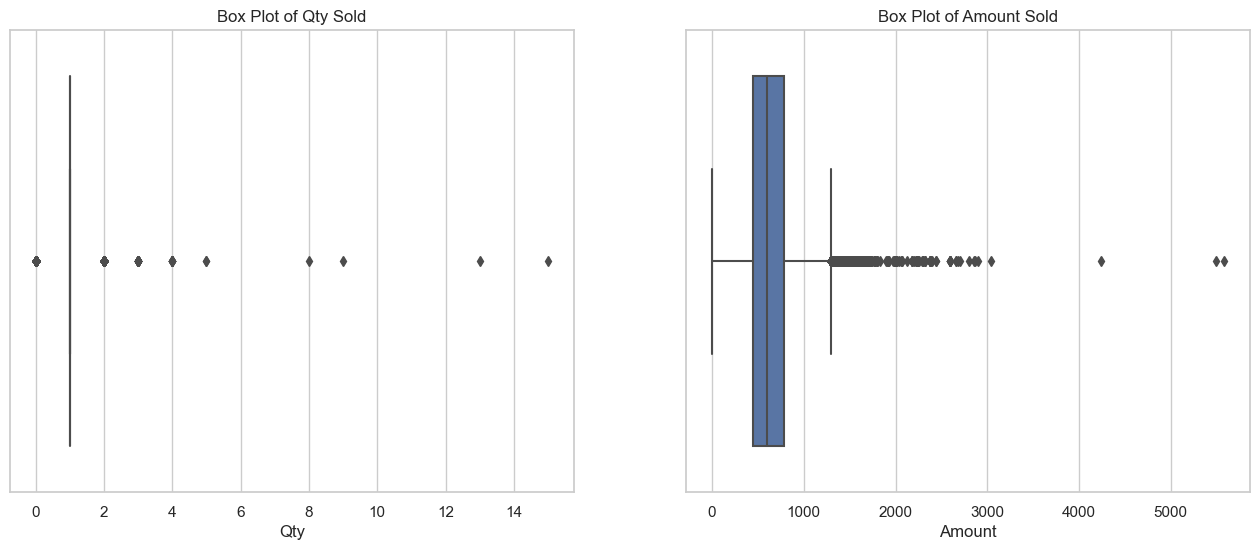

In [56]:
# Generating box plots for Quantity and Amount to identify outliers
num_cols = ['Qty', 'Amount']
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
count = 0
for col in num_cols:
    # Box plot for Quantity
    sns.boxplot(x=df[col], ax=ax[count])
    ax[count].set_title(f'Box Plot of {col} Sold')
    ax[count].set_xlabel(col)
    count+=1


- #### Analyzing relationships between sales and promotions
    - Checking the impact of promotions on sales amount

plt.figure(figsize=(10, 6))
sns.boxplot(x='promotion-ids', y='Amount', data=df)
plt.xticks(rotation=90)
plt.title('Sales Amount by Promotion')
plt.xlabel('Promotion IDs')
plt.ylabel('Sales Amount')
plt.show()

- #### Exploring the relationship between product categories and sales

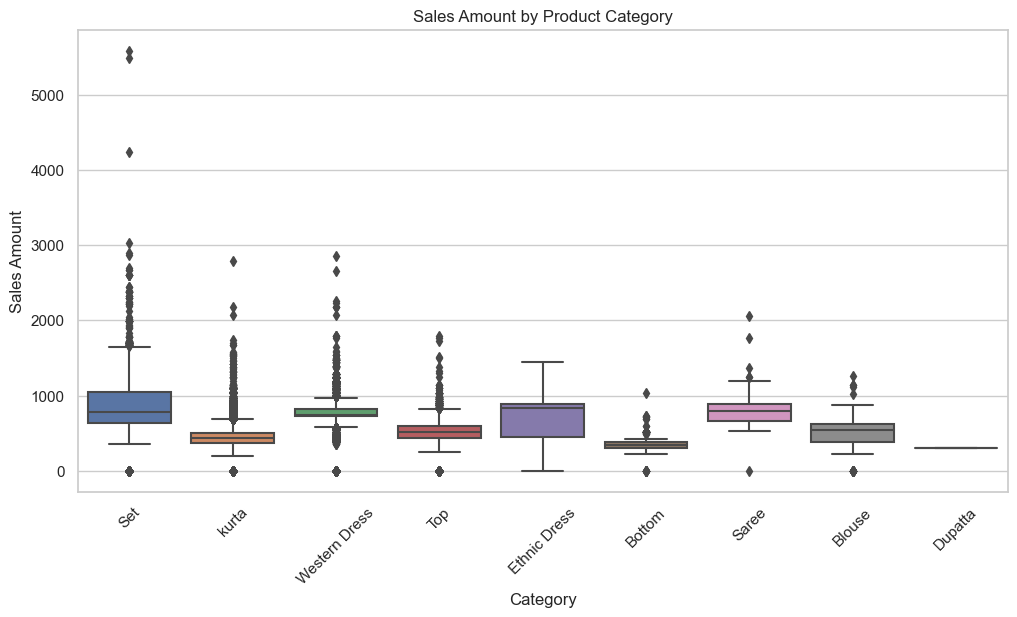

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Amount', data=df)
plt.xticks(rotation=45)
plt.title('Sales Amount by Product Category')
plt.xlabel('Category')
plt.ylabel('Sales Amount')
plt.show()

- #### Examining sales channels impact on sales

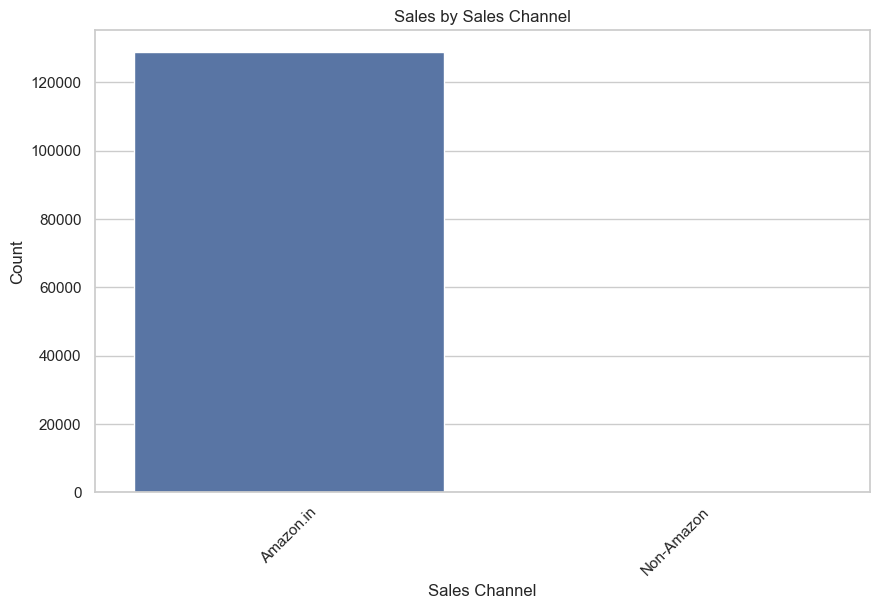

In [58]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sales Channel', data=df)
plt.title('Sales by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

- #### Analyzing the quantity sold by product category to understand popular products

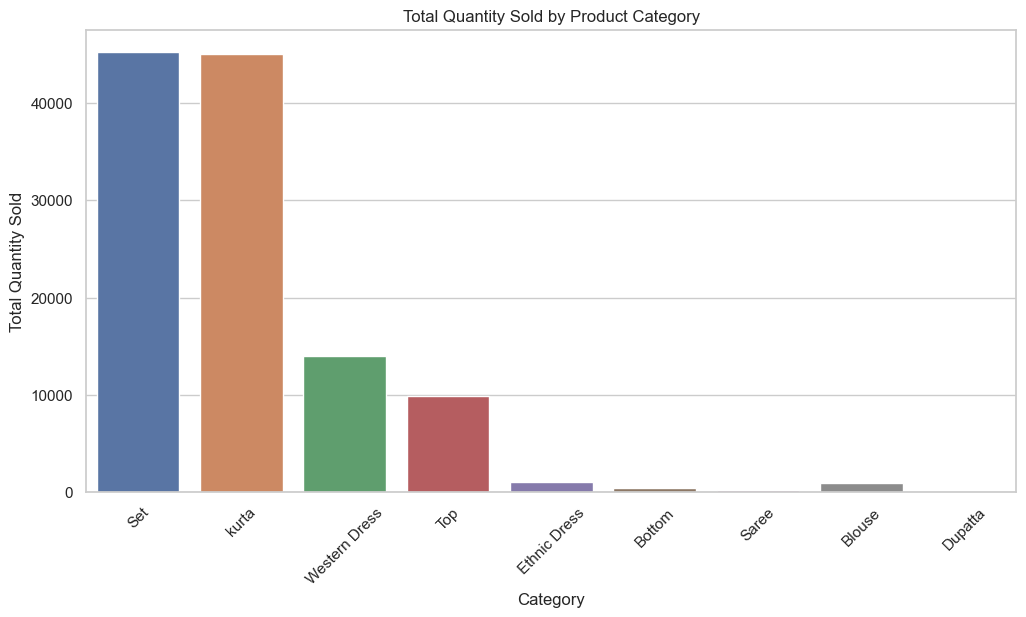

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Qty', data=df, estimator=sum, errorbar=None)
plt.xticks(rotation=45)
plt.title('Total Quantity Sold by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.show()

- #### Checking for any relationship between B2B transactions and sales amount

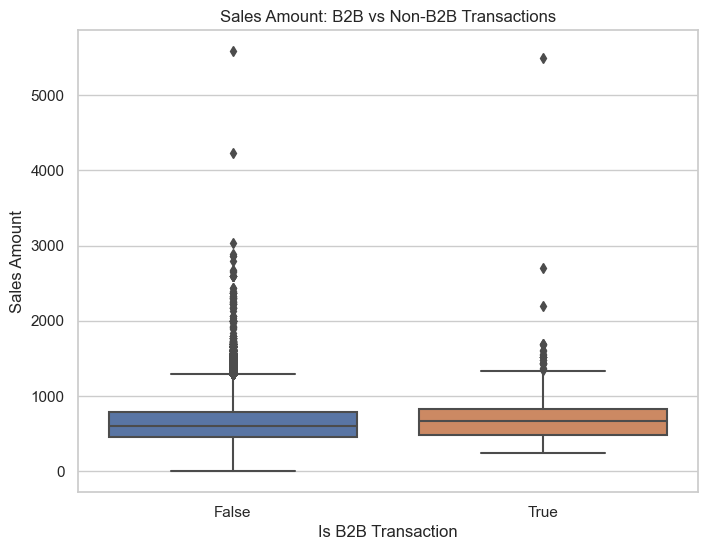

In [60]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='B2B', y='Amount', data=df)
plt.title('Sales Amount: B2B vs Non-B2B Transactions')
plt.xlabel('Is B2B Transaction')
plt.ylabel('Sales Amount')
plt.show()

In [63]:
# Check for any inconsistencies in categorical data (e.g., different labels for the same category)
for column in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in {column}:\n", df[column].unique())

# Checking for any anomalies in numerical data (e.g., negative values where not expected)
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    negative_values_count = (df[column] < 0).sum()
    print(f"\nNumber of negative values in {column}:", negative_values_count)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Unique values in Order ID:
 ['405-8078784-5731545' '171-9198151-1101146' '404-0687676-7273146' ...
 '407-9547469-3152358' '402-6184140-0545956' '408-7436540-8728312']

Unique values in Date:
 ['2022-04-30' '2022-04-29' '2022-04-28' '2022-04-27' '2022-04-26'
 '2022-04-25' '2022-04-24' '2022-04-23' '2022-04-22' '2022-04-21'
 '2022-04-20' '2022-04-19' '2022-04-18' '2022-04-17' '2022-04-16'
 '2022-04-15' '2022-04-14' '2022-04-13' '2022-04-12' '2022-04-11'
 '2022-04-10' '2022-04-09' '2022-04-08' '2022-04-07' '2022-04-06'
 '2022-04-05' '2022-04-04' '2022-04-03' '2022-04-02' '2022-04-01'
 '2022-03-31' '2022-05-31' '2022-05-30' '2022-05-29' '2022-05-28'
 '2022-05-27' '2022-05-26' '2022-05-25' '2022-05-24' '2022-05-23'
 '2022-05-22' '2022-05-21' '2022-05-20' '2022-05-19' '2022-05-18'
 '2022-05-17' '2022-05-16' '2022-05-15' '2022-05-14' '2022-05-13'
 '2022-05-12' '2022-05-11' '2022-05-10' '2022-05-09' '2022-05-08'
 '2022-05-07' '2022-05-06' '2022-05-05' '2022-05-04' '2022-05-03'
 '2022-05-02' '


Number of duplicate rows: 6
